In [ ]:
pip install wooldridge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.4 MB/s eta 0:00:00


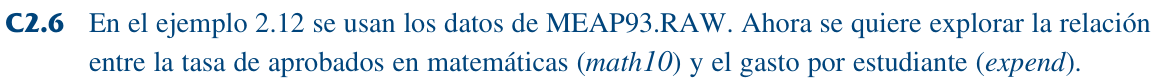

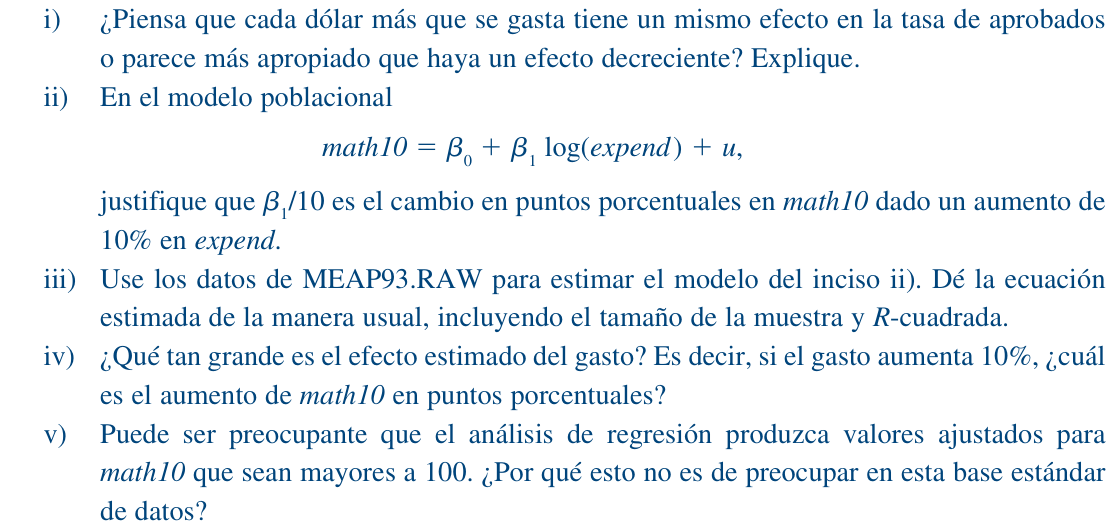

In [ ]:
import wooldridge as wd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos MEAP93
data = wd.data('meap93')

# Vista rápida de los datos
data.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


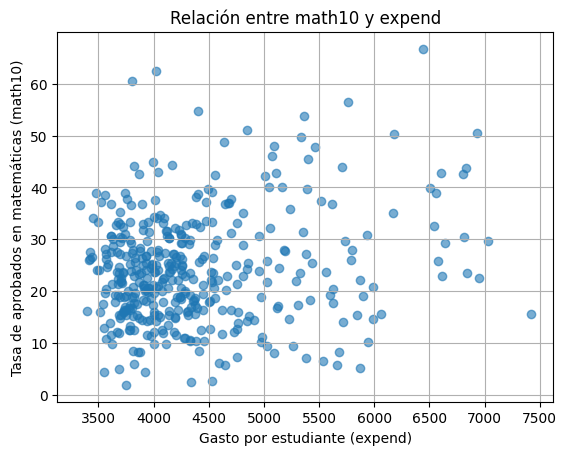

In [ ]:
# i) Relación entre math10 y expend
plt.scatter(data['expend'], data['math10'], alpha=0.6)
plt.title('Relación entre math10 y expend')
plt.xlabel('Gasto por estudiante (expend)')
plt.ylabel('Tasa de aprobados en matemáticas (math10)')
plt.grid(True)
plt.show()

No parece razonable asumir que cada dólar adicional gastado tenga el mismo efecto en la tasa de aprobados. Es más apropiado considerar un efecto decreciente, ya que los retornos marginales suelen disminuir: al principio, un mayor gasto puede mejorar significativamente los recursos educativos y los resultados académicos, pero, después de cierto punto, los incrementos adicionales en el gasto tendrán un impacto menor. El uso del logaritmo en el modelo captura esta idea, ya que implica una relación no lineal entre el gasto y la tasa de aprobados.

In [ ]:
# ii) Modelo: math10 ~ log(expend)

#### 1. Modelo planteado

El modelo poblacional es:  
$$
\text{math10} = \beta_0 + \beta_1 \cdot \log(\text{expend}) + u
$$
Donde:  
- $ \text{math10} $: Tasa de aprobados en matemáticas.  
- $ \text{expend} $: Gasto por estudiante.  
- $ \log(\text{expend}) $: Logaritmo natural del gasto por estudiante.  
- $ u $: Término de error.

#### 2. Interpretación del coeficiente $ \beta_1 $

El coeficiente $ \beta_1 $ mide el cambio en $ \text{math10} $ asociado con un cambio unitario en $ \log(\text{expend}) $.  
Esto puede escribirse como:  
$$
\Delta \text{math10} = \beta_1 \cdot \Delta \log(\text{expend})
$$

#### 3. Incremento del 10% en $ \text{expend} $

Un aumento del 10% en $ \text{expend} $ implica que:
$$
\text{expend}_{\text{nuevo}} = \text{expend} \cdot 1.10
$$

El cambio en $ \log(\text{expend}) $ se calcula como:
$$
\Delta \log(\text{expend}) = \log(\text{expend}_{\text{nuevo}}) - \log(\text{expend})
$$

Usando la propiedad del logaritmo:  
$$
\log(a \cdot b) = \log(a) + \log(b)
$$  
Sustituimos:
$$
\Delta \log(\text{expend}) = \log(\text{expend}) + \log(1.10) - \log(\text{expend})
$$  
Simplificando:
$$
\Delta \log(\text{expend}) = \log(1.10)
$$

#### 4. Cambio en $ \text{math10} $

El cambio en $ \text{math10} $ debido a un aumento del 10% en $ \text{expend} $ es:
$$
\Delta \text{math10} = \beta_1 \cdot \log(1.10)
$$

El valor de $ \log(1.10) $ es aproximadamente $ 0.10 $ (para pequeños incrementos). Entonces:
$$
\Delta \text{math10} = \beta_1 \cdot 0.10
$$

#### 5. Interpretación en puntos porcentuales

Dividiendo entre 10, obtenemos el cambio promedio en $ \text{math10} $ por un incremento del 10% en $ \text{expend} $:
$$
\Delta \text{math10} = \frac{\beta_1}{10}
$$

Por lo tanto, $ \beta_1 / 10 $ representa el cambio en puntos porcentuales en la tasa de aprobados ($ \text{math10} $) asociado con un aumento del 10% en el gasto por estudiante ($ \text{expend} $).

In [ ]:
# iii) Estimar el modelo
data['log_expend'] = np.log(data['expend'])  # Crear log(expend)
model = smf.ols('math10 ~ log_expend', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           0.000475
Time:                        17:37:39   Log-Likelihood:                -1531.4
No. Observations:                 408   AIC:                             3067.
Df Residuals:                     406   BIC:                             3075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.3412     26.530     -2.614      0.0

In [ ]:
# iv) Evaluar valores ajustados para math10
beta_1 = model.params['log_expend']
effect_10_percent = beta_1 / 10
print(f"Cambio en math10 por un aumento del 10% en expend: {effect_10_percent:.2f} puntos porcentuales")

Cambio en math10 por un aumento del 10% en expend: 1.12 puntos porcentuales


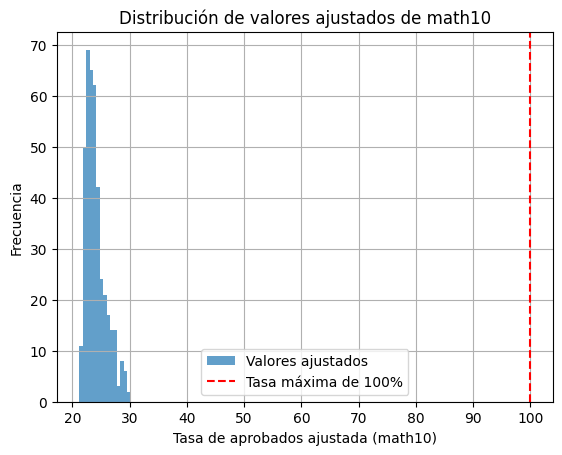

In [ ]:
# v) Evaluar valores ajustados para math10
model = smf.ols('math10 ~ log_expend', data=data).fit()
data['math10_pred'] = model.fittedvalues
plt.hist(data['math10_pred'], bins=15, alpha=0.7, label='Valores ajustados')
plt.axvline(100, color='r', linestyle='--', label='Tasa máxima de 100%')
plt.title('Distribución de valores ajustados de math10')
plt.xlabel('Tasa de aprobados ajustada (math10)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

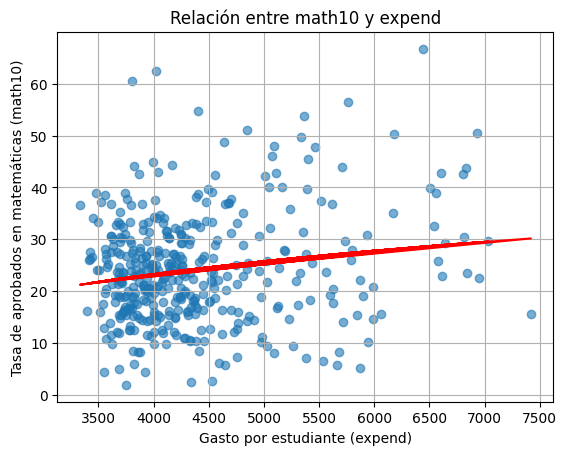

In [ ]:
plt.scatter(data['expend'], data['math10'], alpha=0.6)
plt.plot(data['expend'], data['math10_pred'], c='red')
plt.title('Relación entre math10 y expend')
plt.xlabel('Gasto por estudiante (expend)')
plt.ylabel('Tasa de aprobados en matemáticas (math10)')
plt.grid(True)
plt.show()